All text messages have one of three numbers, which are the label: -1, 0 or 1. Those labels mean:

-1: negative sentiment.

0: neutral sentiment.

1: positive sentiment.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import spacy

from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, HashingVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

from sklearn.model_selection import train_test_split

In [2]:
#Extract reddit data
reddit_data = pd.read_csv('reddit_Data.csv')
reddit_data.rename(columns = {'clean_comment': 'text'}, inplace = True)

In [3]:
#Extract twitter data
twitter_data = pd.read_csv('Twitter_Data.csv')
twitter_data.rename(columns = {'clean_text': 'text'}, inplace = True)

In [4]:
#Combine both dataframes into one master dataframe
data = pd.concat([reddit_data, twitter_data], ignore_index = True)

FIRST ANALYSIS:

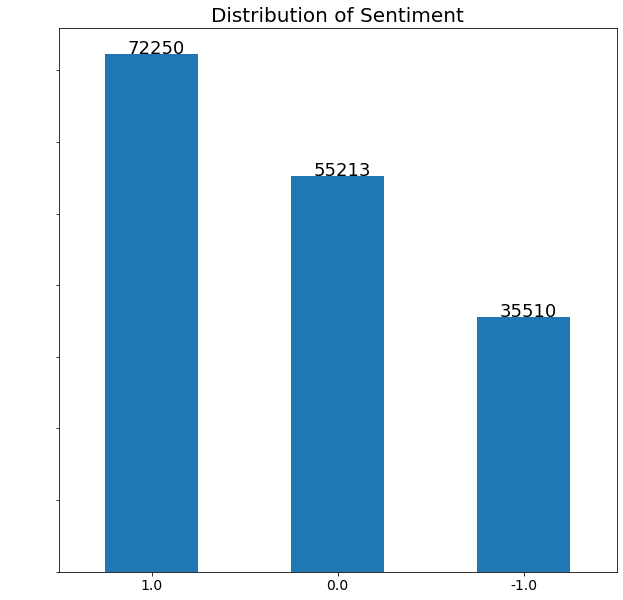

In [5]:
fig , ax = plt.subplots(figsize = (10,10))
ax = twitter_data['category'].value_counts().plot(kind = 'bar')

plt.xticks(rotation = 0, size = 14)
plt.yticks(size = 14, color = 'white')
plt.title('Distribution of Sentiment', size = 20)

ax.annotate(text = twitter_data['category'].value_counts().values[0], xy = (-0.13,twitter_data['category'].value_counts().values[0]), size = 18)
ax.annotate(text = twitter_data['category'].value_counts().values[1], xy = (0.87,twitter_data['category'].value_counts().values[1]), size = 18)
ax.annotate(text = twitter_data['category'].value_counts().values[2], xy = (1.87,twitter_data['category'].value_counts().values[2]), size = 18)

plt.show()

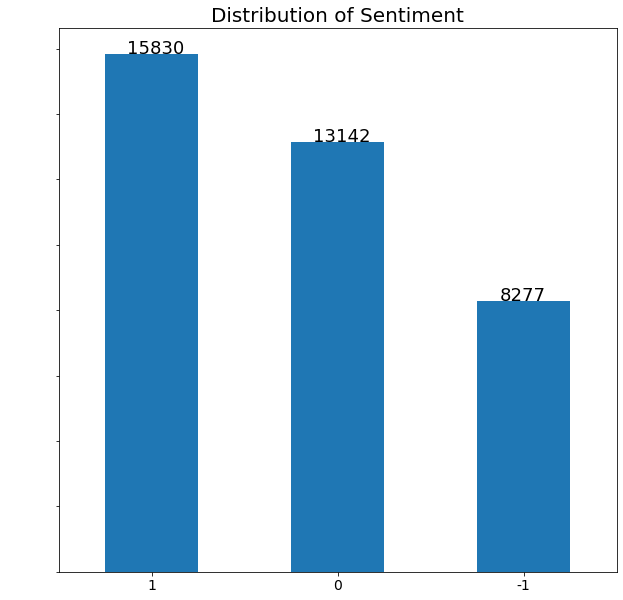

In [6]:
fig , ax = plt.subplots(figsize = (10,10))
ax = reddit_data['category'].value_counts().plot(kind = 'bar')

plt.xticks(rotation = 0, size = 14)
plt.yticks(size = 14, color = 'white')
plt.title('Distribution of Sentiment', size = 20)

ax.annotate(text = reddit_data['category'].value_counts().values[0], xy = (-0.13,reddit_data['category'].value_counts().values[0]), size = 18)
ax.annotate(text = reddit_data['category'].value_counts().values[1], xy = (0.87,reddit_data['category'].value_counts().values[1]), size = 18)
ax.annotate(text = reddit_data['category'].value_counts().values[2], xy = (1.87,reddit_data['category'].value_counts().values[2]), size = 18)

plt.show()

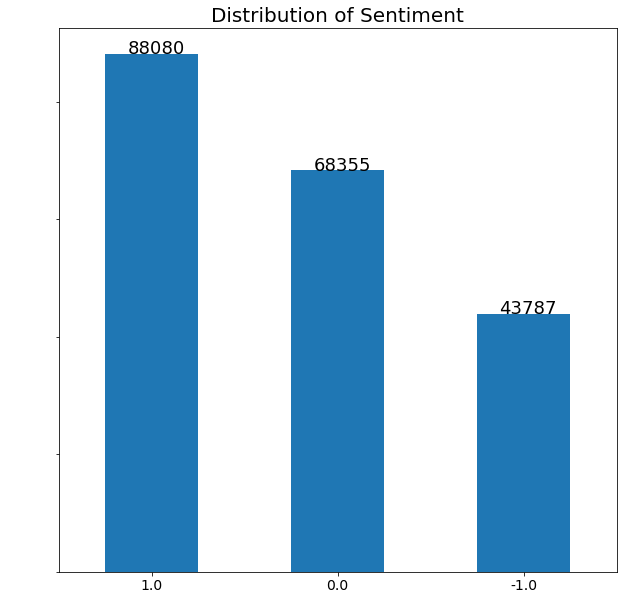

In [7]:
fig , ax = plt.subplots(figsize = (10,10))
ax = data['category'].value_counts().plot(kind = 'bar')

plt.xticks(rotation = 0, size = 14)
plt.yticks(size = 14, color = 'white')
plt.title('Distribution of Sentiment', size = 20)

ax.annotate(text = data['category'].value_counts().values[0], xy = (-0.13,88079), size = 18)
ax.annotate(text = data['category'].value_counts().values[1], xy = (0.87,68253), size = 18)
ax.annotate(text = data['category'].value_counts().values[2], xy = (1.87,43786), size = 18)

plt.show()

### USING SVM

MODEL AND PREDICTION MADE WITH TWITTER DATAFRAME:

In [8]:
twitter_data.isna().sum()

text        4
category    7
dtype: int64

In [9]:
#Drop rows with null values
twitter_data.dropna(axis = 0, inplace = True)

In [10]:
#Checking the shape of the data to ensure nothing is broken
twitter_data.shape

(162969, 2)

In [11]:
# Create a Vectorizer Object using default parameters
hash_vectorizer = HashingVectorizer()

# Convert a collection of text documents to a matrix of token counts
token_count_matrix=hash_vectorizer.fit_transform(twitter_data['text'])
print(f'The size of the count matrix for the texts = {token_count_matrix.get_shape()}')
print(f'The sparse count matrix is as follows:')
print(token_count_matrix)

# Create a tf_idf object using default parameters
tf_idf_transformer=TfidfTransformer(use_idf=True, smooth_idf=True, sublinear_tf=False) 

# Fit to the count matrix, then transform it to a normalized tf-idf representation
twitter_tf_idf_matrix = tf_idf_transformer.fit_transform(token_count_matrix)

#print(f'The size of the tf_idf matrix for the texts = {tf_idf_matrix.get_shape()}')
#print(f'The sparse tf_idf matrix is as follows:')
#print(tf_idf_matrix)

The size of the count matrix for the texts = (162969, 1048576)
The sparse count matrix is as follows:
  (0, 160541)	0.14907119849998599
  (0, 168557)	0.14907119849998599
  (0, 180525)	-0.4472135954999579
  (0, 232512)	0.14907119849998599
  (0, 263274)	0.14907119849998599
  (0, 277794)	-0.14907119849998599
  (0, 286878)	-0.29814239699997197
  (0, 288398)	0.14907119849998599
  (0, 360502)	0.29814239699997197
  (0, 387101)	-0.14907119849998599
  (0, 433698)	0.14907119849998599
  (0, 434864)	0.14907119849998599
  (0, 449993)	-0.14907119849998599
  (0, 465141)	-0.14907119849998599
  (0, 482215)	-0.14907119849998599
  (0, 484920)	-0.14907119849998599
  (0, 490370)	0.29814239699997197
  (0, 522187)	0.14907119849998599
  (0, 614924)	0.14907119849998599
  (0, 646934)	0.14907119849998599
  (0, 747378)	-0.14907119849998599
  (0, 748718)	0.14907119849998599
  (0, 808196)	-0.14907119849998599
  (0, 839641)	-0.14907119849998599
  (0, 865698)	0.14907119849998599
  :	:
  (162968, 257965)	0.16222142113

In [12]:
# Getting X and y

X_twitter = twitter_tf_idf_matrix
y_twitter = twitter_data.category

#Splitting the data into training and testing

X_train_twitter, X_test_twitter, y_train_twitter, y_test_twitter = train_test_split(X_twitter, y_twitter, test_size=0.1)

In [13]:
#Creating, fitting and scoring classifier
twitter_classifier = LinearSVC()
twitter_classifier.fit(X_train_twitter, y_train_twitter)

LinearSVC()

MODEL AND PREDICTION MADE WITH REDDIT DATAFRAME:

In [14]:
reddit_data.isna().sum()

text        100
category      0
dtype: int64

In [15]:
#Drop rows with null values
reddit_data.dropna(axis = 0, inplace = True)

In [16]:
# Create a Vectorizer Object using default parameters
hash_vectorizer = HashingVectorizer()

# Convert a collection of text documents to a matrix of token counts
token_count_matrix=hash_vectorizer.fit_transform(reddit_data['text'])
print(f'The size of the count matrix for the texts = {token_count_matrix.get_shape()}')
print(f'The sparse count matrix is as follows:')
print(token_count_matrix)

# Create a tf_idf object using default parameters
tf_idf_transformer=TfidfTransformer(use_idf=True, smooth_idf=True, sublinear_tf=False) 

# Fit to the count matrix, then transform it to a normalized tf-idf representation
reddit_tf_idf_matrix = tf_idf_transformer.fit_transform(token_count_matrix)

#print(f'The size of the tf_idf matrix for the texts = {tf_idf_matrix.get_shape()}')
#print(f'The sparse tf_idf matrix is as follows:')
#print(tf_idf_matrix)

The size of the count matrix for the texts = (37149, 1048576)
The sparse count matrix is as follows:
  (0, 66497)	0.14002800840280097
  (0, 88541)	0.28005601680560194
  (0, 99311)	0.14002800840280097
  (0, 158803)	-0.28005601680560194
  (0, 176558)	0.14002800840280097
  (0, 180525)	-0.14002800840280097
  (0, 189643)	-0.14002800840280097
  (0, 216640)	-0.14002800840280097
  (0, 246361)	-0.14002800840280097
  (0, 281416)	-0.14002800840280097
  (0, 286878)	-0.28005601680560194
  (0, 298956)	0.14002800840280097
  (0, 331884)	-0.14002800840280097
  (0, 336791)	0.14002800840280097
  (0, 570460)	-0.14002800840280097
  (0, 590295)	-0.14002800840280097
  (0, 636025)	0.14002800840280097
  (0, 639622)	-0.14002800840280097
  (0, 647008)	-0.14002800840280097
  (0, 694840)	0.14002800840280097
  (0, 699224)	-0.14002800840280097
  (0, 720710)	0.14002800840280097
  (0, 770962)	-0.14002800840280097
  (0, 777676)	0.14002800840280097
  (0, 873637)	-0.14002800840280097
  :	:
  (37145, 612207)	-0.2085144140

In [17]:
# Getting X and y

X_reddit = reddit_tf_idf_matrix
y_reddit = reddit_data.category

#Splitting the data into training and testing

X_train_reddit, X_test_reddit, y_train_reddit, y_test_reddit = train_test_split(X_reddit, y_reddit, test_size=0.1)

In [18]:
#Creating, fitting and scoring classifier
reddit_classifier = LinearSVC()
reddit_classifier.fit(X_train_reddit, y_train_reddit)

LinearSVC()

Predictions using both models:

In [19]:
print(f"Accuracy: {twitter_classifier.score(X_test_twitter, y_test_twitter) * 100:.3f}%", )

Accuracy: 94.416%


In [20]:
print(f"Accuracy: {twitter_classifier.score(X_test_reddit, y_test_reddit) * 100:.3f}%", )

Accuracy: 92.705%


In [21]:
print(f"Accuracy: {reddit_classifier.score(X_test_reddit, y_test_reddit) * 100:.3f}%", )

Accuracy: 89.125%


In [22]:
print(f"Accuracy: {reddit_classifier.score(X_test_twitter, y_test_twitter) * 100:.3f}%", )

Accuracy: 85.918%


MODEL AND PREDICTION MADE WITH BOTH DATAFRAMES:

In [23]:
data.isna().sum()

text        104
category      7
dtype: int64

In [24]:
#Drop rows with null values
data.dropna(axis = 0, inplace = True)

In [25]:
#Checking the shape of the data to ensure nothing is broken
data.shape

(200118, 2)

In [26]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,HashingVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Create a Vectorizer Object using default parameters
hash_vectorizer = HashingVectorizer()

# Convert a collection of text documents to a matrix of token counts
token_count_matrix=hash_vectorizer.fit_transform(data['text'])
#print(f'The size of the count matrix for the texts = {token_count_matrix.get_shape()}')
#print(f'The sparse count matrix is as follows:')
#print(token_count_matrix)

# Create a tf_idf object using default parameters
tf_idf_transformer=TfidfTransformer(use_idf=True, smooth_idf=True, sublinear_tf=False) 

# Fit to the count matrix, then transform it to a normalized tf-idf representation
tf_idf_matrix = tf_idf_transformer.fit_transform(token_count_matrix)

print(f'The size of the tf_idf matrix for the texts = {tf_idf_matrix.get_shape()}')
print(f'The sparse tf_idf matrix is as follows:')
print(tf_idf_matrix)

The size of the tf_idf matrix for the texts = (200118, 1048576)
The sparse tf_idf matrix is as follows:
  (0, 1005723)	-0.10434674855047239
  (0, 994433)	0.20921265097415948
  (0, 975831)	-0.07876591237300017
  (0, 949757)	0.10741568289205695
  (0, 930443)	0.07293586296657113
  (0, 927512)	0.24593257824400871
  (0, 905713)	0.11809068666970735
  (0, 901236)	-0.105672412539855
  (0, 899007)	-0.21208407593938183
  (0, 873637)	-0.1901092345355487
  (0, 777676)	0.09861197660578788
  (0, 770962)	-0.24888387265290973
  (0, 720710)	0.18517734322196264
  (0, 699224)	-0.1519147722870182
  (0, 694840)	0.11603906817052086
  (0, 647008)	-0.19963034553967557
  (0, 639622)	-0.20067472298622852
  (0, 636025)	0.1322760125534672
  (0, 590295)	-0.09491272896800283
  (0, 570460)	-0.14735501522285915
  (0, 336791)	0.19736979100171234
  (0, 331884)	-0.07464372128638792
  (0, 298956)	0.2159945766799911
  (0, 286878)	-0.08436432457367855
  (0, 281416)	-0.27657228563153397
  :	:
  (200117, 800174)	-0.260906028

In [27]:
# Getting X and y

X = tf_idf_matrix
y = data.category

#Splitting the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [28]:
#Creating, fitting and scoring classifier
classifier = LinearSVC()
classifier.fit(X_train, y_train)
print(f"Accuracy: {classifier.score(X_test, y_test) * 100:.3f}%", )

Accuracy: 94.553%


In [29]:
classifier.predict(X_test)

array([ 0.,  0., -1., ...,  0.,  1.,  0.])

In [32]:
print(y_test)

60644     0.0
133013    0.0
139170   -1.0
17421     0.0
7962     -1.0
         ... 
29767     1.0
130964   -1.0
48366    -1.0
71172     1.0
137021    0.0
Name: category, Length: 20012, dtype: float64


In [35]:
type(data['text'])

pandas.core.series.Series

In [60]:
text = pd.Series(['I do it'])

In [61]:
text

0    I do it
dtype: object

In [62]:
hash_vectorizer = HashingVectorizer()

# Convert a collection of text documents to a matrix of token counts
token_count_matrix=hash_vectorizer.fit_transform(text)
#print(f'The size of the count matrix for the texts = {token_count_matrix.get_shape()}')
#print(f'The sparse count matrix is as follows:')
#print(token_count_matrix)

# Create a tf_idf object using default parameters
tf_idf_transformer=TfidfTransformer(use_idf=True, smooth_idf=True, sublinear_tf=False) 

# Fit to the count matrix, then transform it to a normalized tf-idf representation
tf_idf_matrix = tf_idf_transformer.fit_transform(token_count_matrix)

In [63]:
classifier.predict(tf_idf_matrix)

array([0.])

In [78]:
# Function that prints which sentiment is expressed in one message

def classify(message):
    text = pd.Series(message)
    hash_vectorizer = HashingVectorizer()
    token_count_matrix=hash_vectorizer.fit_transform(text)
    tf_idf_transformer=TfidfTransformer(use_idf=True, smooth_idf=True, sublinear_tf=False) 
    tf_idf_matrix = tf_idf_transformer.fit_transform(token_count_matrix)
    label = int(classifier.predict(tf_idf_matrix)[0])
    if label == -1:
        print('Negative sentiment')
    elif label == 1:
        print('Positive sentiment')
    else:
        print('Neutral sentiment')

In [108]:
# Examples of classification

classify("Oh shit! That's disgusting!")
classify('Fuck the goverment, embrace anarchy.')
print()
classify('I want you to know that I liked it so much')
classify("Donald Trump won the election, and that's fine")
print()
classify('Have you done your homework?')
classify('fslajfldgdiufe hmeior qfewioaehui')

Negative sentiment
Negative sentiment

Positive sentiment
Positive sentiment

Neutral sentiment
Neutral sentiment


In [109]:
classify("I'm afraid because a sheep wants to invade my city")
classify("I love sheeps! They are funny animals!")
classify("A sheep has told me some things which I can't understand")

Negative sentiment
Positive sentiment
Neutral sentiment


In [110]:
classify('I sent you this letter of complaint because the last steel shipment does not match with our order from September 3th. On that date, we placed an order and paid for 75 hardened steel pipes, with 4 inches width and 15 feet long. Today, we received the goods and they have the wrong dimensions as they are 3 inches width instead of 4')
classify("On behalf of myself and all the company, I am especially pleased to congratulate you on your recent nomination as president of the Association. In our opinion, the members' votes have not only made the regard for your own personal prestige clear but also they show the trust that we all hold in you. I hope soon to have the occasion to congratulate you in person and offer you my 100 per cent collaboration.")

Negative sentiment
Positive sentiment


In [ ]:
#def predict(text):
    d = {'col1': [text]}
    text = pd.DataFrame(data=d)
    # Create a Vectorizer Object using default parameters
    hash_vectorizer = HashingVectorizer()

    # Convert a collection of text documents to a matrix of token counts
    token_count_matrix=hash_vectorizer.fit_transform(text)

    # Create a tf_idf object using default parameters
    tf_idf_transformer=TfidfTransformer(use_idf=True, smooth_idf=True, sublinear_tf=False) 

    # Fit to the count matrix, then transform it to a normalized tf-idf representation
    tf_idf_matrix = tf_idf_transformer.fit_transform(token_count_matrix)
    print(token_count_matrix)
    print(tf_idf_transformer)
    print(tf_idf_matrix)
    # return classifier.predict(tf_idf_matrix)

In [ ]:
text = "family mormon have never tried explain them they still stare puzzled from time time like some kind"
predict(text)

In [ ]:
def predict(text):
        vec = TfidfVectorizer(min_df=3,lowercase=True, sublinear_tf=True, use_idf=True,vocabulary=list(set(text)))
        train_vector = vec.fit_transform(X_train)
        #print("Generating model")
        #self.svm_classifier.fit(train_vector,self.train_labels)
        test_vector = vec.transform(text)
        #print("Classifying Data")
        print(test_vector)
        return classifier.predict(test_vector) 

In [ ]:
text = "hello"
predict(text)

In [ ]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(data)

docs_new = ['God is love', 'OpenGL on the GPU is fast']
X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = classifier.predict(X_new_tfidf)

for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, data.target_names[category]))

### USING XG BOOST

In [ ]:
import xgboost

In [ ]:
twitter_classifier = xgboost.XGBClassifier()
twitter_classifier.fit(X_train_twitter, y_train_twitter)

In [ ]:
#Creating, fitting and scoring classifier
reddit_classifier = XGBClassifier()
reddit_classifier.fit(X_train_reddit, y_train_reddit)

In [ ]:
#Creating, fitting and scoring classifier
twitter_classifier = SVC()
twitter_classifier.fit(X_train_twitter, y_train_twitter, kernel='poly')